# Coursework 1

## Question 1.a
Partition the provided face data into your training and testing data, in a way you choose.
Explain briefly the way you partitioned. Apply PCA to your training data i.e. compute the
eigenvectors and eigenvalues of the covariance matrix S=(1/N)AA T directly. Show and discuss, including: the eigenvectors and eigenvalues, the mean image, how many
eigenvectors are with non-zero eigenvalues, and how many eigenvectors are to be used
for face recognition. Give physical meanings behind your answers.

### Loading Face Dataset

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat( 'face(1).mat' )

mat_content

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

* __X__ contains the face data, where each column of __X__ is a one image from a total of 520 images.
* __l__ contains the label/face identity of each image

In [2]:
face_data = mat_content[ 'X' ]

print( face_data.shape )

(2576, 520)


Each image is a column that is 2576 values long.

In [3]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


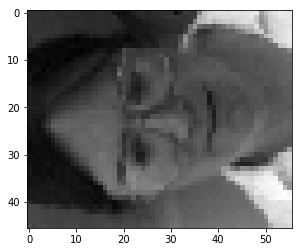

In [4]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

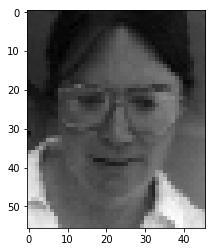

In [5]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [6]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


___
### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From [StackOverflow: Stratified Sampling Necessary?](https://datascience.stackexchange.com/questions/16265/is-stratified-sampling-necessary-random-forest-python)

In [7]:
print( face_data.shape )

(2576, 520)


#### Reshaping Data Set
Personally, I find it weird having each image in a column as opposed to a row. In my head, it makes much more sense of each image was in a row.

Tranpose the dataset, so we have __520__ rows, each one __2576__ long containing a face image.

In [8]:
face_data_row = face_data.T
print( face_data_row.shape )

(520, 2576)


In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data_row, test_size = 0.2, random_state = 42 )

In [10]:
print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[0] / face_data_row.shape[ 0 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[0] / face_data_row.shape[ 0 ]) )

Train Set: (416, 2576), Percentage: 80.0 %
Test  Set: (104, 2576), Percentage: 20.0 %


#### Dataset with labels
It might be a good idea to have the identity labels attached to the dataset

In [11]:
face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)


In [12]:
faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Labeled Shape: (2577, 520)


We now have a dataset __faceDataLabeled__ which contains the images with their identities in the bottom-most row.

In [13]:
rowLabel = faceDataLabeled[ 2576 ]

___
### Applying PCA 
We dont actually need class labels for PCA analysis, so we can use the **train_set** data set instead of the __faceDataLabeled__ data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [14]:
train_set[ : 1] # Access a row

print( train_set[ : , 1 ].shape ) # Access a column

(416,)


In [15]:
# Some dirty list comprehension below. Essentially iterate over the columns in the train_set and calculate
# mean for each column ( d means )
mean_face_row = np.array( [ [ np.mean( train_set[ : ,col ] ) for col in range( train_set.shape[ 1 ] ) ] ] ) 

print( 'Mean Vector: \n {}'.format( mean_face_row ) )

Mean Vector: 
 [[124.06971154 123.26682692 121.08413462 ...  85.33653846  83.44711538
   81.86298077]]


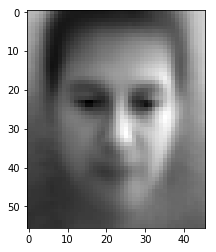

In [16]:
mean_face_img = np.reshape(mean_face_row,(46,56))

plt.imshow( mean_face_img.T, cmap = 'gist_gray')

#### Computing Covariance Matrix

In [21]:
cov_mat = np.cov( [ col for col in train_set.T ] )

print( 'Shape of cov_mat: {}'.format( cov_mat.shape ) )

Shape of cov_mat: (2576, 2576)


The covariance matrix contains the covariance between each pair of features, all 2576 of them, resulting in a $2576\times2576$ matrix. Along the main diagonal of the matrix, we have the variance of the feature.

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably. 

[Mean Vector and Covariance Matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)

##### Why do we need the covariance matrix?

The following article is a __mustread__. It goes over the covariance matrix, and why calculating the eigenvectors is important.

[A geometric interpretation of the covariance matrix](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/?fbclid=IwAR2HCYZtV9m7_miA3YeMD2Cpx5w9wT8UlO3ncGWiJN-FNHvx3Tvsz2bgUJc)

#### Computing Eigenvectors and corresponding eigenvalues

Eigenvectors and eigenvalues uniquely define the covariance matrix, and as such, the data set.

In [18]:
eig_val, eig_vec = np.linalg.eig( cov_mat )

In [19]:
eig_val.shape

(2576,)

We can interpret the covariance matrix as a linear operator that transforms white data into the data that is observed in the training set.

The covariance matrix defines both the spread and orientation of our data. We would like to represent the covariance matrix with a vector and its magnitude. What we want to do is find the vector that points into the direction of the largest spread of data, and whose magnitude equals the spread in that direction.

Define the vector $\textbf{v}$, and the dataset $\textbf{D}$. The projection of the data onto this vector is $\textbf{v}^T \textbf{D}$, and the variance is $\textbf{v}^T\sum \textbf{v}$

We want the vector that points in the direction of largest variance, so we choose components such that the covariance matrix of the projected data is as large as possible. This is achieved by setting $\textbf{v}$ equal to the largest eigenvector of the covariance matrix. The second largest eigenvector is always orthogonal to the largest eigenvector, and points into the direction of the second largest spread of data.

#### Sorting eigenvectors based on eigenvalues

In [20]:
eig_pairs = [ (np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]

eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in eig_pairs:
    print( i[ 0 ])

927253.6841063226
533813.8378604053
449959.4799822334
263874.7054866035
223942.473402727
142059.10068695009
133012.73500235882
116332.77629895524
99478.55501971242
81207.79804071409
62483.50527319482
58698.96440793419
52337.07132887365
51218.49722105482
45745.37628656087
42273.46899059608
39672.50501857014
35423.48368828111
33807.733284157555
32806.52347804843
29535.333277494083
26433.38140506749
25743.795385880603
24553.29527162201
22854.450963161293
22305.221658975046
21003.577261056136
20035.867476395775
19145.239210888434
18629.475853845663
17997.25518583383
17198.039266303047
16997.833201324225
15861.863719660767
15548.106162564673
14341.336991784063
13953.478422614568
13843.367529751602
13194.075603726365
12771.547468981911
12426.518048051317
11707.66784847261
11391.57382579886
11139.390881573816
10885.840639905062
10549.773922907789
10092.122494709349
9875.183183397716
9649.106573224984
9465.733475121418
9027.942927203501
8848.458328396995
8641.361657973435
8357.733865169133
826

9.66806843237636e-12
9.66806843237636e-12
9.612587121573121e-12
9.612587121573121e-12
9.607663281064562e-12
9.607663281064562e-12
9.570324461827066e-12
9.570324461827066e-12
9.558383609693918e-12
9.558383609693918e-12
9.544709648677351e-12
9.544709648677351e-12
9.54196441225865e-12
9.54196441225865e-12
9.516534632874808e-12
9.516534632874808e-12
9.505327583706631e-12
9.505327583706631e-12
9.48961213482675e-12
9.48961213482675e-12
9.471237220441942e-12
9.471237220441942e-12
9.446333890360304e-12
9.446333890360304e-12
9.429111089670727e-12
9.429111089670727e-12
9.379819446901554e-12
9.379819446901554e-12
9.371776680498474e-12
9.371776680498474e-12
9.366797297791817e-12
9.366797297791817e-12
9.356420412396861e-12
9.356420412396861e-12
9.328343740543439e-12
9.328343740543439e-12
9.271276155928811e-12
9.271276155928811e-12
9.266790962931616e-12
9.247837235000806e-12
9.247837235000806e-12
9.230551735305707e-12
9.230551735305707e-12
9.203637563565323e-12
9.203637563565323e-12
9.18947193704330

5.8734972795815e-12
5.864768381250512e-12
5.864768381250512e-12
5.831267696702227e-12
5.831267696702227e-12
5.8115311488685226e-12
5.8115311488685226e-12
5.79486095532166e-12
5.79486095532166e-12
5.789954225976321e-12
5.789954225976321e-12
5.783349486127295e-12
5.783349486127295e-12
5.782919873443333e-12
5.782919873443333e-12
5.7772847105753495e-12
5.7772847105753495e-12
5.760536291655968e-12
5.760536291655968e-12
5.748151103765404e-12
5.748151103765404e-12
5.726244478318253e-12
5.726244478318253e-12
5.725109515794808e-12
5.725109515794808e-12
5.715845104028176e-12
5.715845104028176e-12
5.691031017112462e-12
5.691031017112462e-12
5.688638929051817e-12
5.688638929051817e-12
5.6505823659050576e-12
5.6505823659050576e-12
5.647666844365457e-12
5.647666844365457e-12
5.632757423209335e-12
5.632757423209335e-12
5.631806630833247e-12
5.631806630833247e-12
5.607868795694987e-12
5.607868795694987e-12
5.5811319114398165e-12
5.5811319114398165e-12
5.581115616420065e-12
5.581115616420065e-12
5.5744

3.5747370400492895e-12
3.571960451171655e-12
3.571960451171655e-12
3.5664165004651502e-12
3.5664165004651502e-12
3.559270900880255e-12
3.559270900880255e-12
3.555656615574315e-12
3.555656615574315e-12
3.5529503057311127e-12
3.5529503057311127e-12
3.5483839871898228e-12
3.5483839871898228e-12
3.5191191801033643e-12
3.5167256356848434e-12
3.5167256356848434e-12
3.5085450071169178e-12
3.5085450071169178e-12
3.485627316260033e-12
3.485627316260033e-12
3.4834265796980037e-12
3.4834265796980037e-12
3.4684937667207485e-12
3.4684937667207485e-12
3.460058586817498e-12
3.460058586817498e-12
3.4595358966844893e-12
3.4595358966844893e-12
3.4548804136891987e-12
3.4548804136891987e-12
3.4479664460145823e-12
3.4479664460145823e-12
3.431863891124526e-12
3.431863891124526e-12
3.431246618948058e-12
3.431246618948058e-12
3.4191231209553007e-12
3.4191231209553007e-12
3.4154249782786245e-12
3.4154249782786245e-12
3.4121107979382985e-12
3.410473060356658e-12
3.410473060356658e-12
3.400857599235695e-12
3.400

1.7015869614326354e-12
1.7015869614326354e-12
1.697995667327069e-12
1.697995667327069e-12
1.6977147190282141e-12
1.6977147190282141e-12
1.6916889671234505e-12
1.6916889671234505e-12
1.6878634867104689e-12
1.6878634867104689e-12
1.6709197278900725e-12
1.6709197278900725e-12
1.6494575012580029e-12
1.6494575012580029e-12
1.644899165817502e-12
1.644899165817502e-12
1.6271264020029352e-12
1.6271264020029352e-12
1.6207953521423122e-12
1.6207953521423122e-12
1.6177474841275037e-12
1.6177474841275037e-12
1.616041422001955e-12
1.616041422001955e-12
1.6099210216631046e-12
1.6099210216631046e-12
1.6002397513599115e-12
1.6002397513599115e-12
1.5874949836930436e-12
1.5874949836930436e-12
1.5755979165524569e-12
1.5755979165524569e-12
1.5652571296655914e-12
1.5264548268245789e-12
1.5264548268245789e-12
1.5200603950236676e-12
1.5200603950236676e-12
1.508190620927547e-12
1.508190620927547e-12
1.5071511104534893e-12
1.5071511104534893e-12
1.5014211091390554e-12
1.5014211091390554e-12
1.4891472522167417e

By quickly scrolling through the ordered eigenvalue eigenvector pairs, we can see that as we reach the bottom, we have eigenvalues which are very small (order of magnitude $10^{-11}$ and smaller). This suggests that these eigenvectors have the smallest spread of data. 

For the purpose of PCA, we want the eigenvectors with large eigenvalues, since they represent the data the most. The eigenvectors with smal eigenvalues close to 0 can be discarded.

In [26]:
k_eig_pairs = []

for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        k_eig_pairs.append( i )

In [27]:
for i in k_eig_pairs:
    print( i[ 0 ] )

927253.6841063226
533813.8378604053
449959.4799822334
263874.7054866035
223942.473402727
142059.10068695009
133012.73500235882
116332.77629895524
99478.55501971242
81207.79804071409
62483.50527319482
58698.96440793419
52337.07132887365
51218.49722105482
45745.37628656087
42273.46899059608
39672.50501857014
35423.48368828111
33807.733284157555
32806.52347804843
29535.333277494083
26433.38140506749
25743.795385880603
24553.29527162201
22854.450963161293
22305.221658975046
21003.577261056136
20035.867476395775
19145.239210888434
18629.475853845663
17997.25518583383
17198.039266303047
16997.833201324225
15861.863719660767
15548.106162564673
14341.336991784063
13953.478422614568
13843.367529751602
13194.075603726365
12771.547468981911
12426.518048051317
11707.66784847261
11391.57382579886
11139.390881573816
10885.840639905062
10549.773922907789
10092.122494709349
9875.183183397716
9649.106573224984
9465.733475121418
9027.942927203501
8848.458328396995
8641.361657973435
8357.733865169133
826

We can now represent the face images using this subset of the eigenvectors.

In [29]:
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( k_eig_pairs ) ) )

Original Eig_Pairs: 2576
Reduced Eig_Pairs: 415


We have reduced the dimensions from 2576 to 415 features. We can do face recognition by projecting training images onto this smaller subset and calculating the weights for each eigenvector.

[Eigenfaces for recognition](https://www.cs.ucsb.edu/~mturk/Papers/jcn.pdf)

Check if every element in the eigenvector is real: True


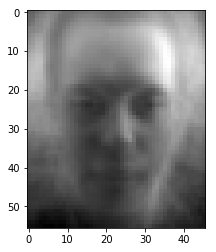

In [50]:
eigen_face_1 = k_eig_pairs[ 0 ][ 1 ]

print( 'Check if every element in the eigenvector is real: {}'.format( all( item for item in np.isreal( eigen_face_1 ) ) ) )

eigen_face_1_real = eigen_face_1.real

eigen_face_1_img = np.reshape(eigen_face_1_real,(46,56))

plt.imshow( eigen_face_1_img.T, cmap = 'gist_gray')

We now have 415 __eigenfaces__. Above is the eigenface of the eigenvector with the largest data spread.